# Segunda preentrega - Curso Data Science INGENIAS

## Integrantes

   * Cristina Betancur
   * Melani Caucota
   * Maribel Carrasco
   * Virginia Chirilá

## Dataset elegido

Encuesta Anual de Hogares del año 2019 de la Ciudad Autónoma de Buenos Aires (CABA) realizado por la Dirección General de Estadísticas y Censos.

### Fuente
https://data.buenosaires.gob.ar/dataset/encuesta-anual-hogares/resource/3a45c563-396d-42de-ba93-8a93729e0723

## Objetivo

El objetivo de este trabajo consiste en realizar un análisis exploratorio de los datos del dataset mencionado,  llevar adelante las transformaciones necesarias y la generación de nuevas variables y realizar un análisis predictivo sobre el nivel de ingresos de las personas de CABA, tomando como unidad de estudio a las personas y no a los hogares. En particular, se busca estudiar cómo inciden determinadas variables demográficas y socio-económicas en el nivel de ingresos de las personas tales como aspectos etarios y demográficos (edad, comuna, dominio y lugar de nacimiento), aspectos socio-laborales (estado_ocupacional, categoria ocupacional, calidad de ingresos laborables, calidad_ingresos_no_laborables, calidad de ingresos totales y calidad de ingresos familiars), aspectos educativos (estado educativo, sector educativo, nivel actual, nivel máximo educativo y años de escolaridad) , y de salud (afiliación de salud).


## Librerías

In [1]:
#Importando librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

## Data set

In [2]:
# Importo archivo csv
datos = pd.read_csv("encuesta-anual-hogares-2019.csv", delimiter=',')

In [3]:
# Inspecciono las 5 primeras filas
datos.head(5)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,Otra provincia,Solo plan de medicina prepaga por contratación...,No,No corresponde
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,33333,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,Si,2
4,2,1,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Secundario/medio comun,EGB (1° a 9° año),10,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde


### Dimensiones data set

In [4]:
# Utilizamos el método .shape para obtener las dimensiones del data frame: cantidad de filas y columnas
datos.shape

(14319, 31)

## Variables

El data frame brinda información sobre la situación socioeconómica de la población de la Ciudad de Buenos Aires, sus hogares y sus viviendas. Contiene variables relacionadas a vivienda y hábitat, hogares (tamaño y composición de los hogares), características demográficas básicas de la población (composición y estructura, situación conyugal, migración), trabajo y empleo (situación de la población en el mercado de trabajo, características ocupacionales), ingresos (laborales y no laborales), educación (asistencia al sistema de educación formal, nivel educativo de la población), salud (tipo de cobertura, consultas al
médico, estado general de salud) y fecundidad.

### Nombre de las variables

In [5]:
#Obtengo nombre de las columnas
datos.columns

Index(['id', 'nhogar', 'miembro', 'comuna', 'dominio', 'edad', 'sexo',
       'parentesco_jefe', 'situacion_conyugal', 'num_miembro_padre',
       'num_miembro_madre', 'estado_ocupacional', 'cat_ocupacional',
       'calidad_ingresos_lab', 'ingreso_total_lab', 'calidad_ingresos_no_lab',
       'ingreso_total_no_lab', 'calidad_ingresos_totales', 'ingresos_totales',
       'calidad_ingresos_familiares', 'ingresos_familiares',
       'ingreso_per_capita_familiar', 'estado_educativo', 'sector_educativo',
       'nivel_actual', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'afiliacion_salud', 'hijos_nacidos_vivos',
       'cantidad_hijos_nac_vivos'],
      dtype='object')

### Descripción de variables

1. **id:** Clave que identifica a la vivienda  
2. **nhogar:** La variable id + nhogar componen la clave que identifica a cada hogar  
3. **miembro:** Variables id + nhogar+ miembro componen la clave que identifica a cada persona  
4. **comuna:** Comuna donde reside la persona encuestada. _Variable categórica nominal con 15 niveles: números de comuna del uno al 15._
5. **dominio:** Variable categórica que indica si la vivienda se ubica en una villa de emergencia. _Variable categórica nominal con dos niveles: 'Resto de la Ciudad' y 'Villas de emergencia'_
6. **edad:**	Edad de la persona encuestada. _Variable cuantitativa discreta._
7. **sexo:**	Sexo de la persona encuestada. _Variable categórica binaria con dos niveles: 'Mujer' y 'Varon'._
8. **parentesco_jefe:** Variable categórica que indica la relación de parentesco entre la persona encuestada y el jefe/a de hogar. _Variable categórica nominal con 9 niveles: 'Jefe', 'Otro no familiar', 'Padre/Madre/Suegro/a','Otro familiar', 'Conyugue o pareja', 'Hijo/a - Hijastro/a', Nieto/a', 'Yerno/nuera' y 'Servicio domestico y sus familiares'._  
9. **situacion_conyugal:** Situación conyugal de la persona encuestada. _Variable categórica nominal con 7 niveles: 'Soltero/a', 'Viudo/a', 'Unido/a', 'No corresponde', 'Separado/a de unión o matrimonio', 'Divorciado/a' y 'Casado/a'._  
10. **num_miembro_padre:**	Número de miembro del hogar (variable miembro) que corresponde al padre del individuo.
11. **num_miembro_madre:**	Número de miembro del hogar (variable miembro) que corresponde a la madre del individuo. 
12. **estado_ocupacional:** Situación ocupacional de la persona encuestada. _Variable categórica nominal con 3 niveles: 'Inactivo', 'Ocupado' y 'Desocupado'._
13. **cat_ocupacional:** Categoría ocupacional de la persona encuestada. _Variable categórica nominal con 5 niveles: 'No corresponde', 'Asalariado', 'Trabajador por cuenta propia', 'Patron/empleador' y 'Trabajador familiar'._
14. **calidad_ingresos_lab:** Calidad de la declaración de ingresos laborales totales. _Variable categórica nominal con 4 niveles: 'No tuvo ingresos', 'Tuvo ingresos y declara monto','No corresponde'y 'Tuvo ingresos pero no declara monto'_
15. **ingreso_total_lab:**	Monto del ingreso total laboral percibido el mes anterior. _Variable cuantitativa continua._
16. **calidad_ingresos_no_lab:** Calidad de la declaración de ingresos no laborales totales. _Variable categórica nominal con 4 niveles: 'Tuvo ingresos y declara monto', 'No tuvo ingresos', 'Tuvo ingresos pero no declara monto' y 'No corresponde'._
17. **ingreso_total_no_lab:**	Monto del ingreso total no laboral percibido el mes anterior. _Variable cuantitativa continua._
18. **calidad_ingresos_totales:**	Calidad de ingresos totales individuales. _Variable categórica nominal con 4 niveles: 'Tuvo ingresos y declara monto', 'No tuvo ingresos','Tuvo ingresos pero no declara monto' y'No corresponde'._ 
19. **ingresos_totales:** Monto del ingreso total individual percibido el mes anterior. _Variable cuantitativa continua._
20. **calidad_ingresos_familiares:**	Calidad de ingresos totales familiares. _Variable categórica nominal con 3 niveles: 'Tuvo ingresos y declara monto','Tuvo ingresos pero no declara monto' y 'No tuvo ingresos'._
21. **ingresos_familiares:** Monto de ingresos totales familiares percibido el mes anterior. _Variable cuantitativa continua._
22. **ingreso_per_capita_familiar:** Monto de ingresos totales familiares percibido el mes anterior. _Variable cuantitativa continua._
23. **estado_educativo:** Asistencia (pasada o presente) o no a algún establecimiento educativo. _Variable categórica nominal con tres niveles: 'Nunca asistio', 'No asiste pero asistió' y 'Asiste'._ 
24. **sector_educativo:** Sector al que pertenece el establecimiento educativo al que asiste. _Variable categórica nominal con 4 niveles: 'Estatal/publico', 'Privado religioso', 'No corresponde' y 'Privado no religioso'._
25. **nivel_actual:** Nivel cursado al momento de la encuesta. _Variable categórica nominal con 14 niveles: 'Universitario', 'No corresponde', 'Secundario/medio comun', 'Terciario/superior no universitario', 'Jardin maternal','Secundario/medio adultos', 'Sala de 4', 'Primario comun', 'Sala de 5', 'Postgrado', 'Sala de 3', 'Primario adultos','Primario especial' y 'Otras escuelas especiales'._
26. **nivel_max_educativo:** Máximo nivel educativo que se cursó. _Variable categórica nominal con 7 niveles: 'Otras escuelas especiales', 'Secundario/medio comun','EGB (1° a 9° año)', 'Primario especial', 'Primario comun', 'Sala de 5' y 'No corresponde'._
27. **años_escolaridad:** Años de escolaridad alcanzados. _Variable cuantitativa discreta._
28. **lugar_nacimiento:** Lugar de nacimiento de la persona encuestada. _Variable categórica nominal con 7 niveles: 'PBA excepto GBA', 'Otra provincia', 'CABA', 'Partido GBA', 'Pais no limitrofe', 'Pais limitrofe' y 'PBA sin especificar'._
29. **afiliacion_salud:** Afiliación de salud de la persona encuestada. _Variable categórica nominal con 5 niveles: 'Solo obra social', 'Solo plan de medicina prepaga por contratación voluntaria', 'Solo prepaga o mutual via OS', 'Solo sistema publico' y 'Otros'._
30. **hijos_nacidos_vivos:** Tiene o tuvo hijos nacidos vivos. _Variable categórica binaria. Dos niveles: 'Si' y 'No'._
31. **cantidad_hijos_nac_vivos:** Cantidad de hijos nacidos vivos. _Variable cuantitativa discreta._

### Tipo de datos de cada columna

In [6]:
# Exploramos los tipos de datos de cada columna
datos.dtypes

id                              int64
nhogar                          int64
miembro                         int64
comuna                          int64
dominio                        object
edad                            int64
sexo                           object
parentesco_jefe                object
situacion_conyugal             object
num_miembro_padre              object
num_miembro_madre              object
estado_ocupacional             object
cat_ocupacional                object
calidad_ingresos_lab           object
ingreso_total_lab               int64
calidad_ingresos_no_lab        object
ingreso_total_no_lab            int64
calidad_ingresos_totales       object
ingresos_totales                int64
calidad_ingresos_familiares    object
ingresos_familiares             int64
ingreso_per_capita_familiar     int64
estado_educativo               object
sector_educativo               object
nivel_actual                   object
nivel_max_educativo            object
años_escolar

## Análisis exploratorio y procesamiento de los datos

El data frame contiene 31 columnas de las cuales 5 corresponden a índices (id, nhogar, miembro,num_miembro_padre y num_miembro_madre), 18 son categóricas y 8 son cuantitativas. 

   


### Cantidad de valores nulos

In [7]:
# Obtengo cantidad de nulos por variable
datos.isnull().sum()

id                                0
nhogar                            0
miembro                           0
comuna                            0
dominio                           0
edad                              0
sexo                              0
parentesco_jefe                   0
situacion_conyugal                1
num_miembro_padre                 0
num_miembro_madre                 0
estado_ocupacional                0
cat_ocupacional                   0
calidad_ingresos_lab              0
ingreso_total_lab                 0
calidad_ingresos_no_lab           0
ingreso_total_no_lab              0
calidad_ingresos_totales          0
ingresos_totales                  0
calidad_ingresos_familiares       0
ingresos_familiares               0
ingreso_per_capita_familiar       0
estado_educativo                  0
sector_educativo                  3
nivel_actual                      0
nivel_max_educativo            1054
años_escolaridad                 62
lugar_nacimiento            

### Exploración de valores nulos presentes


La variable **hijos_nacidos_vivos** contiene la mayor cantidad de valores nulos del data frame, 54% de los registros de la variable son nulos (7784/len(datos)). La información contenida en esta variable es similar a la de la variable **cantidad_hijos_nac_vivos**. Se podría considerar eliminar la variable **hijos_nacidos_vivos** y utilizar **cantidad_hijos_nac_vivos** , que no posee nulos, en los análisis si es necesario.  

In [8]:
# Elimino columna 'hijos_nacidos_vivos'
datos.drop(columns=['hijos_nacidos_vivos'], inplace=True)

En la variable **nivel_max_educativo** los valores nulos estan concentrados en los primeros años de edad. Desde los 0 a los 5 años el número de personas registradas coincide con el número de nulos para cada una de esas edades. Se podría considerar ubicar a los datos para esas edades dentro de una nueva categoría que describa correctamente su situacion por ej: "Todavía no alcanzó ninguno" o utilizar una categoría ya existente como "No corresponde"

In [9]:
# Obtengo la cantidad de valores nulos de la variable nivel_max_educativo por edad y la exploro para los primeros años
count_nulls = datos.groupby('edad')['nivel_max_educativo'].apply(lambda x: x.isnull().sum()) #Calcular el número de nulos por edad
nulls = count_nulls.to_frame() #Convertir serie en data frame
nulls = nulls.reset_index()
nulls = nulls.rename(columns={'nivel_max_educativo': 'nulls_nivel_max_educativo'})
print(nulls.head(10))

   edad  nulls_nivel_max_educativo
0     0                        128
1     1                        148
2     2                        158
3     3                        160
4     4                        177
5     5                        182
6     6                         53
7     7                          1
8     8                          0
9     9                          0


In [10]:
# Obtengo la cantidad deregistros de la variable nivel_max_educativo por edad y la exploro para los primeros años
edades =[0,1,2,3,4,5,6,7,8]
for i in edades:
    numero = (datos['edad'] == i).sum()
    print(i, numero)
    
# Hasta los 5 años los valores nulos coindicen con el numero de personas registradas en ese rango de edades

0 128
1 148
2 158
3 160
4 177
5 182
6 152
7 176
8 176


Text(0.5, 0, 'Edad')

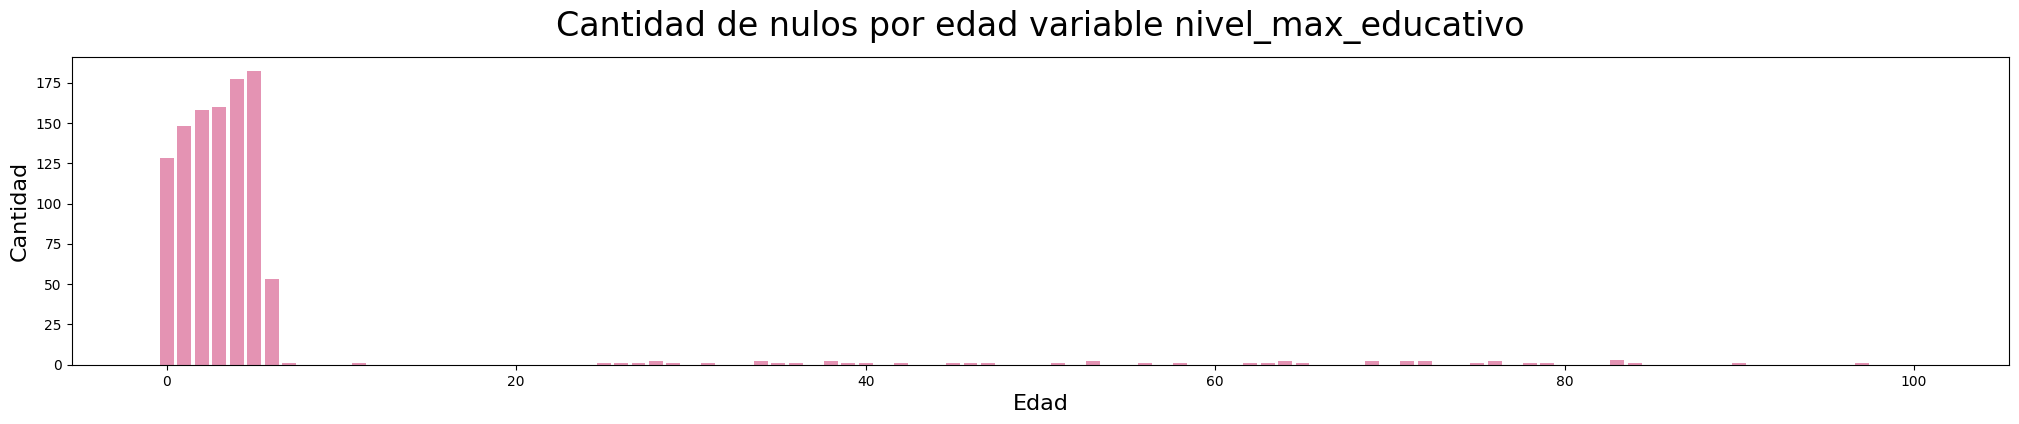

In [11]:
#Gráfico de cantidad de valores nulos por edad
plt.figure(figsize=(25, 4))
plt.bar("edad", "nulls_nivel_max_educativo", data=nulls, color="#E493B3")
plt.title('Cantidad de nulos por edad variable nivel_max_educativo', size=24, pad=15)
plt.ylabel('Cantidad', size=16)
plt.xlabel('Edad', size=16)

Entonces decimos crear una nueva categoría llamada "Todavía no alcanzó ninguno" para la variable **nivel_max_educativo** que agrupe a los niños menores de 5 años.

In [12]:
# Creamos una nueva categoría dentro de la variable nivel_max_educativo que contemple a los menores de 5 años
datos.loc[datos['edad'] < 6, 'nivel_max_educativo'] = 'Todavía no alcanzó ninguno'

In [13]:
#Exploramos el cambio 
datos['nivel_max_educativo'].unique()

array(['Otras escuelas especiales', 'Secundario/medio comun',
       'EGB (1° a 9° año)', 'Primario especial',
       'Todavía no alcanzó ninguno', 'Primario comun', nan, 'Sala de 5',
       'No corresponde'], dtype=object)

In [14]:
#Exploramos los valores nulos nuevamente
datos.isnull().sum()

id                               0
nhogar                           0
miembro                          0
comuna                           0
dominio                          0
edad                             0
sexo                             0
parentesco_jefe                  0
situacion_conyugal               1
num_miembro_padre                0
num_miembro_madre                0
estado_ocupacional               0
cat_ocupacional                  0
calidad_ingresos_lab             0
ingreso_total_lab                0
calidad_ingresos_no_lab          0
ingreso_total_no_lab             0
calidad_ingresos_totales         0
ingresos_totales                 0
calidad_ingresos_familiares      0
ingresos_familiares              0
ingreso_per_capita_familiar      0
estado_educativo                 0
sector_educativo                 3
nivel_actual                     0
nivel_max_educativo            101
años_escolaridad                62
lugar_nacimiento                 1
afiliacion_salud    

Hechos los cambios decidimos eliminar los datos faltantes restantes

In [15]:
# Eliminamos los datos faltantes existentes en todo el data frame
datos = datos.dropna()

In [16]:
#Exploramos los valores nulos nuevamente
datos.isnull().sum()

id                             0
nhogar                         0
miembro                        0
comuna                         0
dominio                        0
edad                           0
sexo                           0
parentesco_jefe                0
situacion_conyugal             0
num_miembro_padre              0
num_miembro_madre              0
estado_ocupacional             0
cat_ocupacional                0
calidad_ingresos_lab           0
ingreso_total_lab              0
calidad_ingresos_no_lab        0
ingreso_total_no_lab           0
calidad_ingresos_totales       0
ingresos_totales               0
calidad_ingresos_familiares    0
ingresos_familiares            0
ingreso_per_capita_familiar    0
estado_educativo               0
sector_educativo               0
nivel_actual                   0
nivel_max_educativo            0
años_escolaridad               0
lugar_nacimiento               0
afiliacion_salud               0
cantidad_hijos_nac_vivos       0
dtype: int

### Creación de nuevas variables

El data frame contiene variables de ingresos laborales en pesos argentinos para el año 2019. Consideramos pertinente crear nuevas variables con los valores de ingresos en dólares estadounidenses a fin de poder extrapolar los datos a la actualidad y comparar con valores en otros países.
Utilizamos el valor alcanzado por el dólar al 30 de diciembre de 2019 que fue de $63.35.   

**Las variables a crear serían:**

- ingreso_total_lab_USD (creada a partir de ingreso_total_lab)     
- ingreso_total_no_lab_USD (creada a partir de ingreso_total_no_lab)  
- ingresos_totales_USD (creada a partir de ingresos_totales)                 
- ingresos_familiares_USD  (creada a partir de ingresos_familiares)          
- ingreso_per_capita_familiar_USD (creada a partir de ingreso_per_capita_familiar)  

In [17]:
# Creamos las variables de ingreso en USD
datos['ingreso_total_lab_USD'] = datos['ingreso_total_lab']/63.35
datos['ingreso_total_no_lab_USD'] = datos['ingreso_total_no_lab']/[63.35]
datos['ingresos_totales_USD'] = datos['ingresos_totales']/63.35
datos['ingresos_familiares_USD'] = datos['ingresos_familiares']/63.35
datos['ingreso_per_capita_familiar_USD'] = datos['ingreso_per_capita_familiar']/63.35

### Transformación de tipos de datos 


In [18]:
#Exploramos nuevamente los tipos de datos antes de analizar los estadisticos descriptivos
datos.dtypes

id                                   int64
nhogar                               int64
miembro                              int64
comuna                               int64
dominio                             object
edad                                 int64
sexo                                object
parentesco_jefe                     object
situacion_conyugal                  object
num_miembro_padre                   object
num_miembro_madre                   object
estado_ocupacional                  object
cat_ocupacional                     object
calidad_ingresos_lab                object
ingreso_total_lab                    int64
calidad_ingresos_no_lab             object
ingreso_total_no_lab                 int64
calidad_ingresos_totales            object
ingresos_totales                     int64
calidad_ingresos_familiares         object
ingresos_familiares                  int64
ingreso_per_capita_familiar          int64
estado_educativo                    object
sector_educ

La variable **años_escolaridad** debería tratarse como una variable cuantitativa discreta. Sin embargo, en los datos existen registros con el siguiente string: _'Ningun año de escolaridad aprobado'_, por esto la columna aparece como un tipo de dato object. Se considera reemplazar estos registros por el valor numérico 0.

In [19]:
# Exploramos los valores de la variable
datos['años_escolaridad'].unique() 

array(['12', '17', '10', '8', 'Ningun año de escolaridad aprobado', '11',
       '9', '13', '7', '16', '14', '15', '5', '6', '2', '19', '4', '1',
       '3', '18'], dtype=object)

In [20]:
# Vemos que tipo de dato es la variable
datos['años_escolaridad'].dtype

dtype('O')

In [21]:
# Cambiamos el valor 'Ningun año de escolaridad aprobado' por 0
datos['años_escolaridad'] = datos['años_escolaridad'].replace({'Ningun año de escolaridad aprobado': 0})

In [22]:
#Cambiamos tipo de dato de la columna de objet a int64
datos['años_escolaridad'] = datos['años_escolaridad'].astype('int64')

In [23]:
# Exploramos el tipo de dato nuevamente
datos['años_escolaridad'].dtype

dtype('int64')

La variable **cantidad_hijos_nac_vivos** debería tratarse como una variable cuantitativa discreta. Sin embargo, en los datos existen registros con el siguiente string: _'No corresponde'_, por esto la columna aparece como un tipo de dato object. Se considera reemplazar estos registros por el valor numérico 0.

In [24]:
# Exploramos los valores de la variable
datos['cantidad_hijos_nac_vivos'].unique()

array(['No corresponde', '2', '1', '3', '5', '7', '4', '6', '9', '8',
       '11', '12', '10', '15'], dtype=object)

In [25]:
# Vemos que tipo de dato es la variable
datos['cantidad_hijos_nac_vivos'].dtype

dtype('O')

In [26]:
# # Cambiamos el valor 'No corresponde' por 0
datos['cantidad_hijos_nac_vivos'] = datos['cantidad_hijos_nac_vivos'].replace({'No corresponde': 0})

In [27]:
#Cambiar tipo de dato de la columna de objet a int64
datos['cantidad_hijos_nac_vivos'] = datos['cantidad_hijos_nac_vivos'].astype('int64')

In [28]:
#Exploramos nuevamente los tipos de datos antes de analizar los estadisticos descriptivos
datos['cantidad_hijos_nac_vivos'].dtype 

dtype('int64')

## Descripción estadistica de las variables

In [29]:
#Obtenemos los estadísticos descriptivos de las variables numéricas
datos.describe()

,id,nhogar,miembro,comuna,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ingreso_per_capita_familiar,años_escolaridad,cantidad_hijos_nac_vivos,ingreso_total_lab_USD,ingreso_total_no_lab_USD,ingresos_totales_USD,ingresos_familiares_USD,ingreso_per_capita_familiar_USD
count,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000
mean,2709.105315,1.009683,2.135426,7.626308,38.908892,20290.588917,6036.073155,26326.662072,70422.935892,26311.200735,10.985652,0.630902,320.293432,95.281344,415.574776,1111.648554,415.330714
std,1535.073358,0.126860,1.350199,4.239135,23.051483,34842.054996,16093.901676,37279.729287,62823.251234,27536.963969,5.293507,1.212974,549.992975,254.047382,588.472443,991.685102,434.679779
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1474.000000,1.000000,1.000000,4.000000,20.000000,0.000000,0.000000,0.000000,30000.000000,10579.000000,7.000000,0.000000,0.000000,0.000000,0.000000,473.559590,166.992897
50%,2611.000000,1.000000,2.000000,8.000000,37.000000,3000.000000,0.000000,16000.000000,54850.000000,20000.000000,12.000000,0.000000,47.355959,0.000000,252.565114,865.824783,315.706393
75%,3896.000000,1.000000,3.000000,11.000000,57.000000,30000.000000,4000.000000,37000.000000,90000.000000,33750.000000,15.000000,1.000000,473.559590,63.141279,584.056827,1420.678769,532.754538
max,5795.000000,7.000000,19.000000,15.000000,100.000000,1000000.000000,500000.000000,1000000.000000,1000000.000000,1000000.000000,19.000000,15.000000,15785.319653,7892.659826,15785.319653,15785.319653,15785.319653


Del resumen estadístico podemos destacar:
*  **id:** el valor máximo nos da la cantidad de hogares muestreados: 5795
*  **miembro:** el número mínimo registrado de personas por hogar es 1 y el máximo es 19 
*  **comuna:** el valor máximo nos informa que el muestreo tuvo en cuenta el total de comunas de la Ciudad de Buenos Aires: 15 en total
*  **edad:** la edad promedio de las personas encuestadas fue de aproximadamente 39 años. La edad mínima fue de 0 años y la máxima de 100 años. Los valores de la media y la mediana nos informan que la muestra tuvo una mayor proporción de personas jóvenes(ver histograma) que determinó que los datos estuvieran concentrados hacia la izquierda 
*  **años_escolaridad:** los años de escolaridad promedio de los encuestados fueron de aproximadamente 11 años. El mínimo fue cero y el máximo 19. El 50% de las personas se ubicó por debajo de los 12 años de escolaridad.
*  **cantidad_hijos_nac_vivos:** el promedio de cantidad de hijos nacidos vivos fue de aproximadamente 1. El mínimo fue cero y el máximo 15. El 75% de los registros se encontraron por debajo de 1 (Q3).

**Para observar la distribución de los datos de cada variable mirar los boxplots abajo**

### Datos de personas en edad laboral

Los estadísticos descriptivos para las variables de ingresos incluyen registros de personas en edad no laboral (menores de edad), por lo que gran parte de los ceros en esas variables derivan, no de registros de gente en desempleo, si no más bien de individuos que no alcanzan la mayoría de edad para tener un trabajo. Si observamos las medias de ingresos por edad (tabla abajo) vemos que parece que existen individuos menores de entre los 11 y 17 años que perciben algún tipo de ingreso a pesar de ser menores de edad. 

In [30]:
# Calculamos el salario medio por  grupo etario y exploramos 
mediasalario = datos.groupby('edad')['ingresos_totales_USD'].mean() #Calcular el número de nulos por edad
medsalarios = mediasalario.to_frame() #Convertir serie en data frame
medsalarios = medsalarios.reset_index()
medsalarios = medsalarios.rename(columns={'ingresos_totales_USD': 'media_ingresos_totales_USD'})
medsalarios.head(19)

,edad,media_ingresos_totales_USD
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,4,0.000000
5,5,0.000000
6,6,0.000000
7,7,0.000000
8,8,0.000000
9,9,0.000000


Text(0.5, 0, 'Edad')

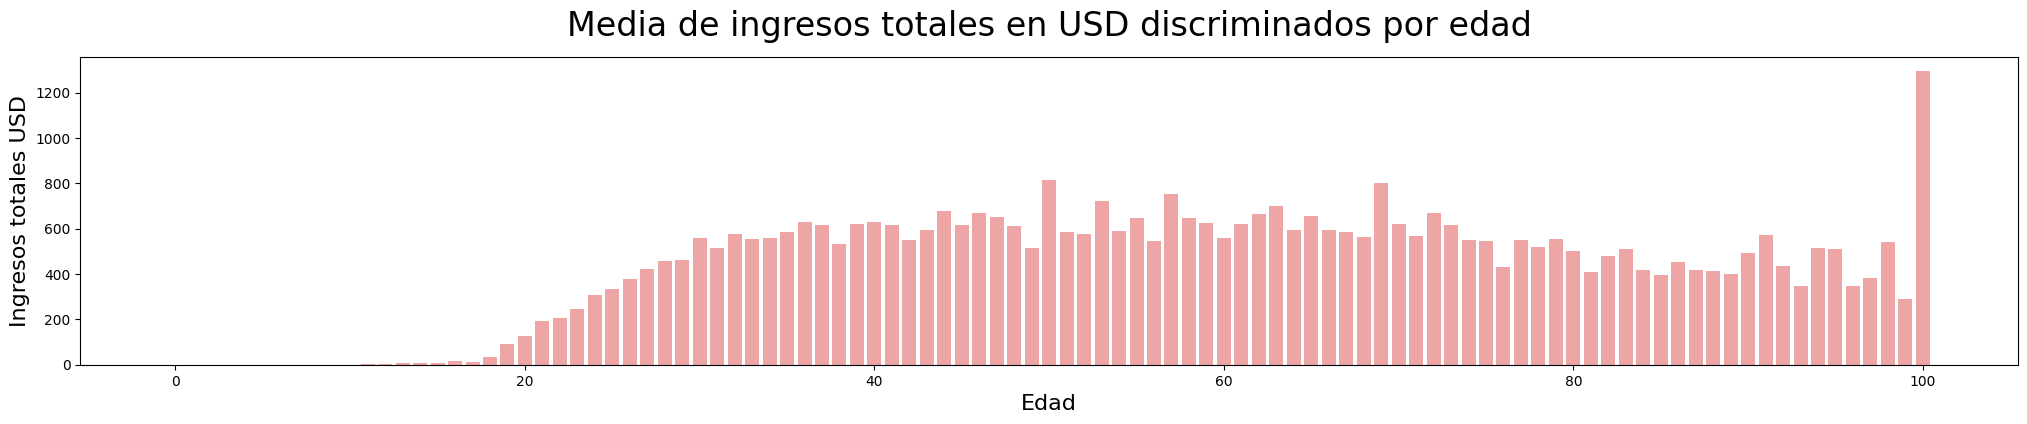

In [31]:
# Graficamos los salarios medios por grupo etario y vemos que los grupos etarios menores a 18 años poseen salarios igual a cero o
# muy bajos
plt.figure(figsize=(25, 4))
plt.bar("edad", "media_ingresos_totales_USD", data=medsalarios, color="#EEA5A6")
plt.title('Media de ingresos totales en USD discriminados por edad', size=24, pad=15)
plt.ylabel('Ingresos totales USD', size=16)
plt.xlabel('Edad', size=16)

Para evitar una subestimación de las medias de las variables de ingresos. Estimamos los estadísticos teniendo en cuenta sólo los individuos en edad laboral (>=18) 

In [32]:
 # Creamos un nuevo data frame con los datos solo de individuos en edad laboral
datoslab = datos[(datos['edad']>=18)]
datoslab.describe()

,id,nhogar,miembro,comuna,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ingreso_per_capita_familiar,años_escolaridad,cantidad_hijos_nac_vivos,ingreso_total_lab_USD,ingreso_total_no_lab_USD,ingresos_totales_USD,ingresos_familiares_USD,ingreso_per_capita_familiar_USD
count,11159.000000,11159.000000,11159.000000,11159.000000,11159.000000,11159.000000,11159.000000,11159.000000,11159.000000,11159.000000,11159.000000,11159.000000,11159.000000,11159.000000,11159.000000,11159.000000,11159.000000
mean,2900.818801,1.009230,1.699167,7.698002,46.975087,25714.396631,7611.874989,33326.271619,71582.341070,28953.352720,12.990949,0.799534,405.909970,120.155880,526.065850,1129.950135,457.037928
std,1583.720781,0.131194,0.942661,4.285875,18.942406,37413.999396,17787.264136,39112.362782,62878.431296,29283.843602,3.618331,1.315472,590.591940,280.777650,617.401149,992.556137,462.254832
min,1.000000,1.000000,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1612.000000,1.000000,1.000000,4.000000,31.000000,0.000000,0.000000,12000.000000,32000.000000,12300.000000,12.000000,0.000000,0.000000,0.000000,189.423836,505.130229,194.159432
50%,2936.000000,1.000000,1.000000,8.000000,44.000000,16000.000000,0.000000,25000.000000,56000.000000,22000.000000,13.000000,0.000000,252.565114,0.000000,394.632991,883.977901,347.277032
75%,4179.000000,1.000000,2.000000,11.000000,62.000000,38000.000000,11000.000000,44000.000000,90000.000000,36500.000000,16.000000,2.000000,599.842147,173.638516,694.554065,1420.678769,576.164167
max,5795.000000,7.000000,15.000000,15.000000,100.000000,1000000.000000,500000.000000,1000000.000000,1000000.000000,1000000.000000,19.000000,15.000000,15785.319653,7892.659826,15785.319653,15785.319653,15785.319653


Del resumen estadístico para los datos de mayores de 18 años podemos destacar: 
*  **edad:** la edad promedio de las personas mayores de edad fue de aproximadamente 47 años. La edad mínima fue de 18 años y la máxima de 100 años. El 50% de las personas se ubicó por debajo de los 44 años de edad.
*  **ingreso_total_lab_USD:** el ingreso en blanco promedio por individuo en edad laboral fue de 403 USD, el 50 % de las personas tuvo un sueldo menor a 253 USD (mediana). El ingreso máximo registrado fue de 15785 USD.
*  **ingreso_total_no_lab_USD:** el ingreso en negro promedio por individuo en edad laboral fue de 120 USD, el 50 % de las personas tuvo sueldos iguales a 0 USD (mediana). El ingreso en negro máximo registrado fue de 7893 USD.
*  **ingresos_totales_USD:** el ingreso total promedio por individuo en edad laboral fue de 522 USD, el 50 % de las personas tuvo sueldos menores a 395 USD (mediana). El ingreso total máximo registrado fue de 15785 USD.
*  **ingresos_familiares_USD:** el ingreso total promedio por familia fue de 1127 USD, el 50 % de los registros tuvo ingresos menores a 876 USD (mediana). El ingreso familiar máximo registrado fue de 15785 USD.
*  **ingreso_per_capita_familiar_USD:** el ingreso total percibido por persona en una familia fue de 455 USD, el 50 % de los registros tuvo ingresos menores a 344 USD (mediana). El ingreso per cápita máximo registrado fue de 15785 USD.

**Para observar la distribución de los datos de cada variable mirar los boxplots abajo**

## Outliers

En el data set tenemos un valor atípico en las variables de ingreso que corresponde a un hogar compuesto por un sólo miembro (id = 3472). Decidimos eliminarlo. 

In [33]:
#Eliminamos el registro con el valor atípico
datos = datos[datos['id'] != 3472]

In [34]:
#Volvemos a filtrar los datos para mayores de edad
datoslab = datos[(datos['edad']>=18)]

### Gráficos

#### Variables demográficas y educativas (Todos los datos)

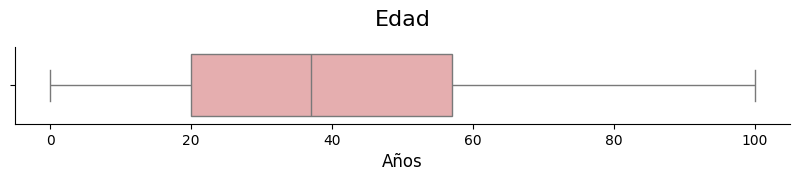

<Figure size 640x480 with 0 Axes>

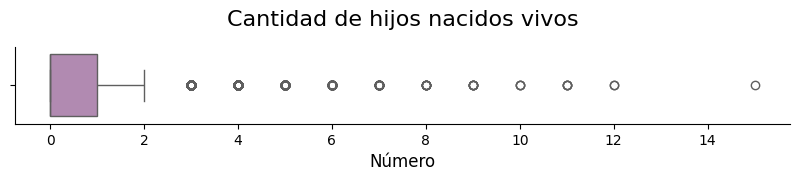

<Figure size 640x480 with 0 Axes>

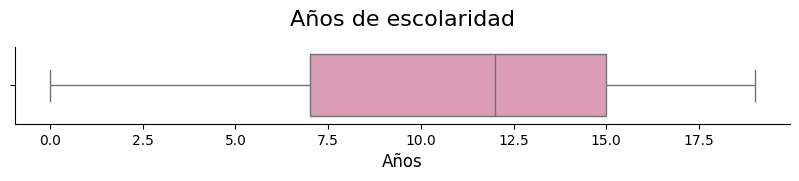

<Figure size 640x480 with 0 Axes>

In [35]:
plt.figure(figsize=(10, 1)) # tamaño de figura

# Subgráfico 1
sns.boxplot(x="edad", data=datos, color="#EEA5A6")
plt.title('Edad', size=16, pad=15)
plt.xlabel('Años', size=12)
plt.ylabel('', size=12)
sns.despine()
plt.show()
sns.despine()

plt.figure(figsize=(10, 1)) 
# Subgráfico 2
sns.boxplot(x="cantidad_hijos_nac_vivos", data=datos, color="#B784B7")
plt.title('Cantidad de hijos nacidos vivos', size=16, pad=15)
plt.xlabel('Número', size=12)
plt.ylabel('', size=12)
sns.despine()
plt.show()
sns.despine()

plt.figure(figsize=(10, 1)) 
# Subgráfico 3
sns.boxplot(x="años_escolaridad", data=datos,color="#E493B3")
plt.title('Años de escolaridad', size=16, pad=15)
plt.xlabel('Años', size=12)
plt.ylabel('', size=12)
plt
sns.despine()
plt.show()
sns.despine()


plt.tight_layout()  #  ajustar automáticamente el diseño de los subgráficos para evitar solapamientos
plt.show()

#### Variables económicas (Datos mayores de edad)

In [36]:
mediatotales= round(datoslab['ingresos_totales_USD'].mean(),2)
mediatotaleslab= round(datoslab['ingreso_total_lab_USD'].mean(),2)
mediatotalesnolab= round(datoslab['ingreso_total_no_lab_USD'].mean(),2)
mediatotalesfam= round(datoslab['ingresos_familiares_USD'].mean(),2)
mediatotalespercap= round(datoslab['ingreso_per_capita_familiar_USD'].mean(),2)

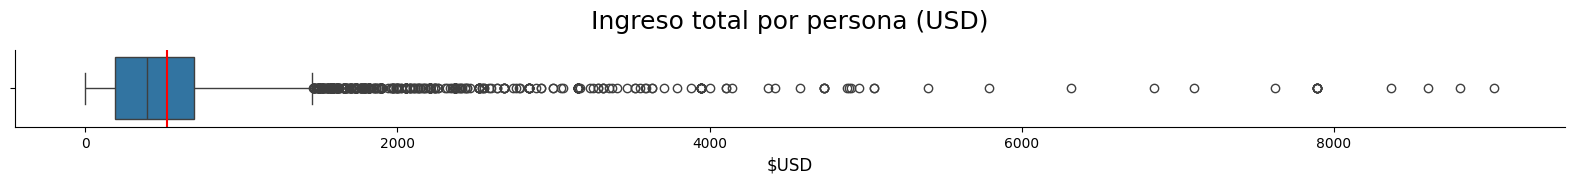

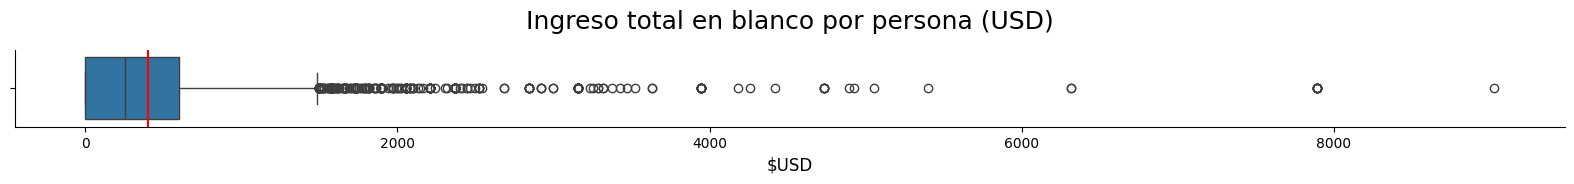

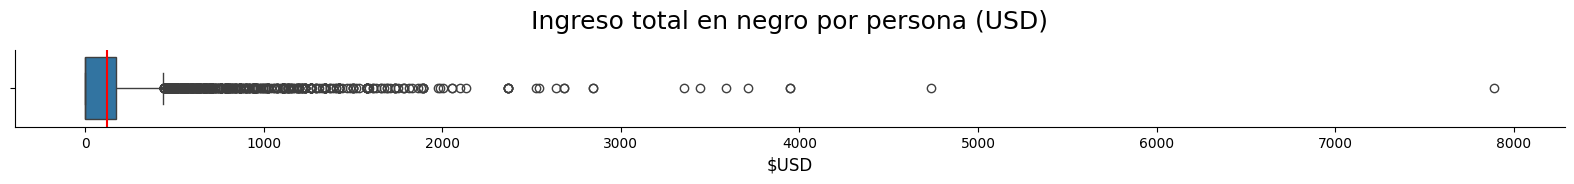

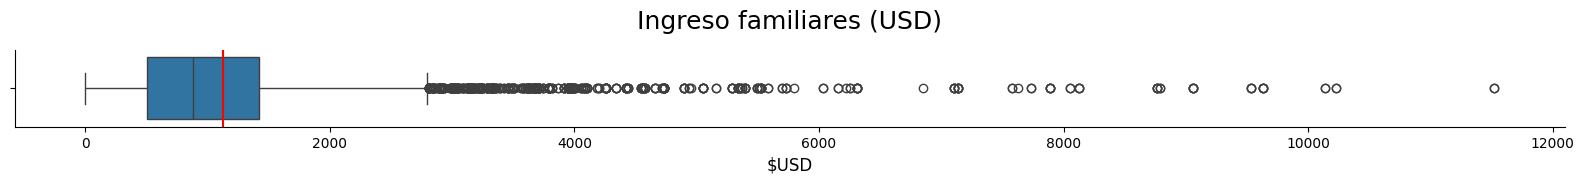

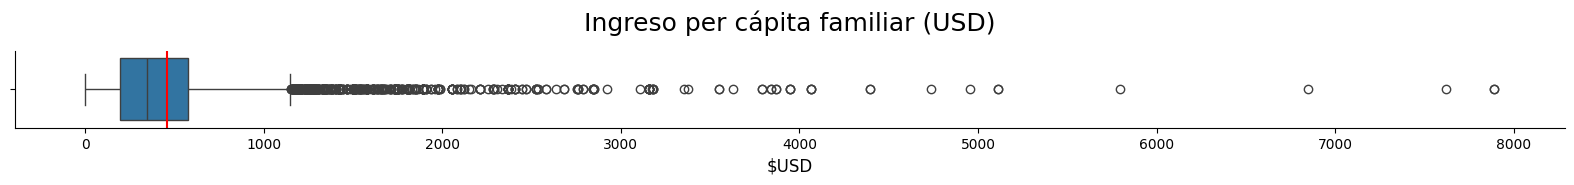

<Figure size 640x480 with 0 Axes>

In [37]:

plt.figure(figsize=(20, 1)) # tamaño de figura

# Subgráfico 1
totales = sns.boxplot(x="ingresos_totales_USD", data=datoslab)
plt.title('Ingreso total por persona (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
totales.axvline(x = mediatotales, color="red")
sns.despine()
plt.show()

plt.figure(figsize=(20, 1)) 
# Subgráfico 2
lab = sns.boxplot(x="ingreso_total_lab_USD", data=datoslab)
plt.title('Ingreso total en blanco por persona (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
lab.axvline(x = mediatotaleslab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(20, 1)) 
# Subgráfico 3
nolab=sns.boxplot(x="ingreso_total_no_lab_USD", data=datoslab)
plt.title('Ingreso total en negro por persona (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
nolab.axvline(x = mediatotalesnolab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(20, 1)) 
# Subgráfico 4
fam=sns.boxplot(x="ingresos_familiares_USD", data=datoslab)
plt.title('Ingreso familiares (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
fam.axvline(x = mediatotalesfam, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(20, 1))
# Subgráfico 5
percap=sns.boxplot(x="ingreso_per_capita_familiar_USD", data=datoslab)
plt.title('Ingreso per cápita familiar (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
percap.axvline(x = mediatotalespercap, color="red")
sns.despine()
plt.show()


plt.tight_layout()  #  ajustar automáticamente el diseño de los subgráficos para evitar solapamientos
plt.show()


Línea roja vertical es la media de cada variable
A partir de los gráficos de caja podemos deducir que todas las variables de ingresos presentan una asimetría marcada hacia la derecha. Es decir que la mayoría de los datos se concentran en valores bajos de ingresos.

#### Ingresos totales por sexo (datos mayores de edad)

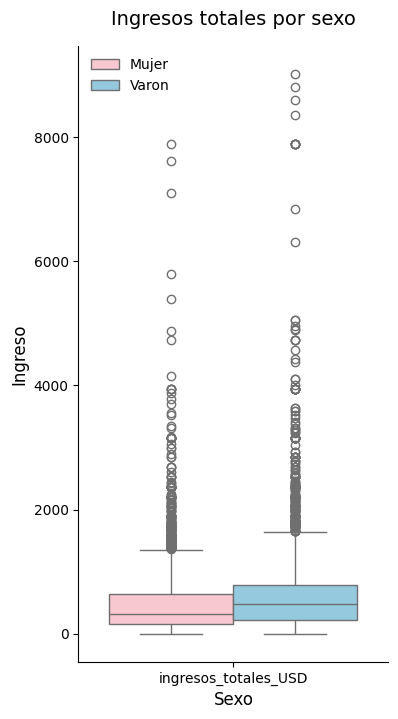

In [38]:
# Ingresos totales por sexo
boxplot_sexo = datoslab.melt(id_vars='sexo', value_vars=['ingresos_totales_USD'])
boxplot_sexo

paleta = {'Varon': 'skyblue', 'Mujer': 'pink'}
plt.figure(figsize=(4, 8))
sns.boxplot(x="variable", y="value", data=boxplot_sexo, palette= paleta, hue='sexo')
plt.title('Ingresos totales por sexo', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('Sexo', size=12)
plt.ylabel('Ingreso', size=12)
sns.despine()
plt.show()

A partir del gráfico podemos decir que la mayoría de los varones parecen percibir un sueldo total mayor al de las mujeres. La dispersión de los datos fue similar para ambos grupos, pero los varones tuvieron valores atípicos superiores a los de las mujeres.

#### Relación de la escolaridad y el empleo formal de las personas (datos mayores de edad)

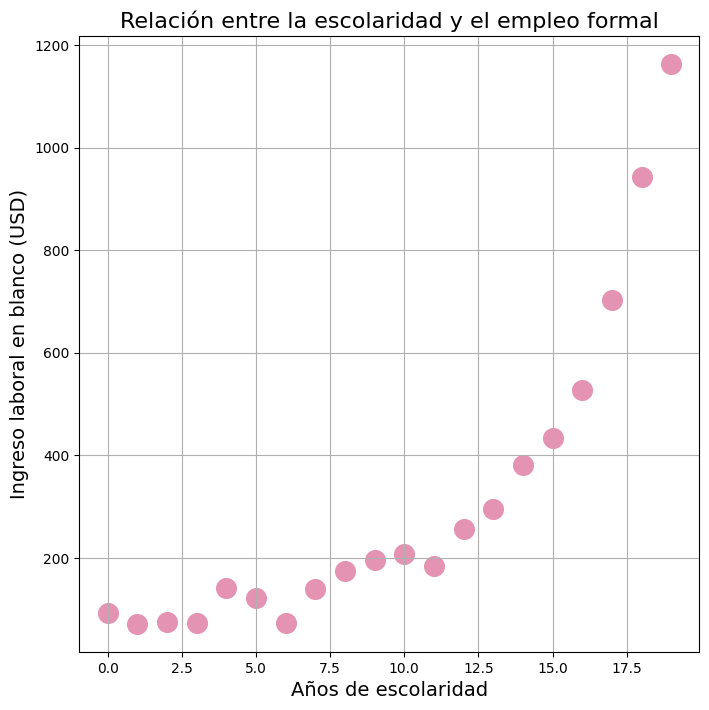

In [39]:
# Relación de la escolaridad y el empleo formal de las personas
# Realizamos un data frame que contenga las medias de ingreso en blanco por año de escolaridad
medias_escolaridad1 = datoslab.groupby(["años_escolaridad"])["ingreso_total_lab_USD"].mean()
medias_escolaridad1
medias_escolaridad1 = medias_escolaridad1.to_frame() #Convertir serie en data frame
medias_escolaridad1 = medias_escolaridad1.reset_index()

# Graficamos la relación entre dos variables
plt.figure(figsize=(8, 8))
plt.scatter('años_escolaridad','ingreso_total_lab_USD', marker='o', data=medias_escolaridad1, s=200, color="#E493B3")  # Crear el gráfico de dispersión
plt.xlabel('Años de escolaridad', size=14)  # Etiqueta del eje x
plt.ylabel('Ingreso laboral en blanco (USD)', size=14)  # Etiqueta del eje y
plt.title('Relación entre la escolaridad y el empleo formal', size=16)  # Título del gráfico
plt.grid(True)  # Mostrar rejilla
plt.show()  # Mostrar el gráfico

In [40]:
datoslab[["años_escolaridad","ingreso_total_lab_USD"]].corr(method='pearson')

,años_escolaridad,ingreso_total_lab_USD
años_escolaridad,1.000000,0.400631
ingreso_total_lab_USD,0.400631,1.000000


A partir del gráfico y del valor del coeficiente de correlación de Pearson podemos decir que existe una relación positiva entre la escolaridad de las personas y el ingreso en blanco que perciben. La relación parece ser no lineal y exponencial.

## Transformación de variables categóricas

### Sexo

In [41]:
datos["sexo"].unique()

array(['Mujer', 'Varon'], dtype=object)

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
encoder= LabelEncoder()

In [44]:
datos.loc[:,"sexo"]= encoder.fit_transform(datos["sexo"])

In [45]:
datos["sexo"].unique()

array([0, 1], dtype=object)

### parentesco_jefe

In [46]:
datos["parentesco_jefe"].unique()

array(['Jefe', 'Otro no familiar', 'Padre/Madre/Suegro/a',
       'Otro familiar', 'Conyugue o pareja', 'Hijo/a - Hijastro/a',
       'Nieto/a', 'Yerno/nuera', 'Servicio domestico y sus familiares'],
      dtype=object)

In [47]:
encoder= LabelEncoder()

In [48]:
datos.loc[:,"parentesco_jefe"]= encoder.fit_transform(datos["parentesco_jefe"])

In [49]:
datos['parentesco_jefe'].unique()

array([2, 5, 6, 4, 0, 1, 3, 8, 7], dtype=object)

### Guardar csv del data frame modificado

In [50]:
#Guardar CSV nuevo
#datos.to_csv("encuesta-anual-hogares-2019-v1.csv", index=False)

